# Background
In this project, I will be looking at the trends of the housing market in the UK. The dataset used shall be the most recent iteration of the UK House Price Index data. This dataset is released monthly as a CSV file, available from the gov.uk website $^1$.

Knowing that this will be a large dataset (~55MB file), it makes sense to import this csv into Python as a pandas dataframe. This object type is well suited to manipulating large datasets and the associated pandas functions are built for data science tasks. Please note: for ease of reference, the csv is saved in the same directory as this notebook.

In [1]:
# Alias pandas as pd
import pandas as pd

# Import the dataset under a new object, hpi
hpi = pd.read_csv("UK-HPI-full-file-2020-11.csv")

# Exploring the data
Firstly, we need to take a look at the shape of the dataframe and the first few rows of data to get a better idea of the dataset.

In [2]:
print(hpi.shape)
print(hpi.head())

(131222, 54)
         Date     RegionName   AreaCode  AveragePrice      Index  IndexSA  \
0  01/01/2004  Aberdeenshire  S12000034   81693.66964  40.864214      NaN   
1  01/02/2004  Aberdeenshire  S12000034   81678.76231  40.856757      NaN   
2  01/03/2004  Aberdeenshire  S12000034   83525.09702  41.780317      NaN   
3  01/04/2004  Aberdeenshire  S12000034   84333.67900  42.184780      NaN   
4  01/05/2004  Aberdeenshire  S12000034   86379.95396  43.208353      NaN   

   1m%Change  12m%Change  AveragePriceSA  SalesVolume  ...     NewPrice  \
0        NaN         NaN             NaN        388.0  ...  88436.13953   
1  -0.018248         NaN             NaN        326.0  ...  88606.44649   
2   2.260483         NaN             NaN        453.0  ...  90296.91375   
3   0.968071         NaN             NaN        571.0  ...  90319.87844   
4   2.426403         NaN             NaN        502.0  ...  91989.17763   

    NewIndex  New1m%Change  New12m%Change  NewSalesVolume     OldPrice  \

We can see that this is a large dataframe with 131222 rows, 54 columns (some of which are not displayed) and there are several missing values.
We need more information to get a better idea of what is and isn't in our dataframe.

In [3]:
print(hpi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131222 entries, 0 to 131221
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    131222 non-null  object 
 1   RegionName              131222 non-null  object 
 2   AreaCode                131222 non-null  object 
 3   AveragePrice            131222 non-null  float64
 4   Index                   131222 non-null  float64
 5   IndexSA                 4329 non-null    float64
 6   1m%Change               130771 non-null  float64
 7   12m%Change              126086 non-null  float64
 8   AveragePriceSA          4329 non-null    float64
 9   SalesVolume             126711 non-null  float64
 10  DetachedPrice           125153 non-null  float64
 11  DetachedIndex           125153 non-null  float64
 12  Detached1m%Change       124736 non-null  float64
 13  Detached12m%Change      120173 non-null  float64
 14  SemiDetachedPrice   

We now have an idea of all the column names and those with missing values - we now know that all but the first 5 columns have missing data. Also, all but the first 3 columns contain numeric data. A crucial step is to make sure the date column is formatted as a date (adapted from code at stackoverflow $^2$).

In [4]:
hpi['Date'] = pd.to_datetime(hpi['Date'], format="%d/%m/%Y")
#Check that the Date column has now changed type to datetime
hpi[['Date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131222 entries, 0 to 131221
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Date    131222 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.0 MB


We can see that the Datatype for the Date column is now set as a datetime.

# Column definitions
From the full dataframe info, we see that some of the column names are slightly ambiguous. The gov.uk website provides definitions for each of these column headers on the 'about' section of the website $^3$. It may help the understanding of the data to be able to quickly view the definitions of the column headings from within Python. Also, for any future work on this dataset, it would be useful to have these column definitions quickly available. A dictionary may allow a quick way for any analyst to quickly access the defintion of a column name.

In [5]:
# Create dictionary of column headers and their defintions
colDict = {
    "Date": "The year and month to which the monthly statistics apply",
    "RegionName": "Name of geography (Country, Regional, County/Unitary/District Authority and London Borough)",
    "AreaCode": "Code of geography (Country, Regional, County/Unitary/District Authority and London Borough)",
    "Average Price": "Average house price for a geography in a particular period",
    "Index": "House price index for a geography in a particular period (January 2015=100).",
    "IndexSA": "Seasonally adjusted house price for a geography in a particular period (January 2015=100).",
    "1m%Change": "The percentage change in the Average Price compared to the previous month",
    "12m%Change": "The percentage change in the Average Price compared to the same period twelve months earlier.",
    "AveragePricesSA": "Seasonally adjusted Average Price for a geography in a particular period",
    "SalesVolume": "Number of registered transactions for a geography in a particular period",
    "[Property Type]Price": "Average house price for a particular property type (such as detached houses), for a geography in a particular period.",
    "[Property Type]Index": "House price index for a particular property type (such as detached houses), for a geography in a particular period (January 2015=100).",
    "[Property Type]1m%Change": "The percentage change in the [Property Type] Price (such as detached houses) compared to the previous month",
    "[Property Type]12m%Change": "The percentage change in the [Property Type] Price (such as detached houses) compared to the same period twelve months earlier.",
    "[Cash/Mortgage]Price": "Average house price by funding status (such as cash), for a geography in a particular period.",
    "[Cash/Mortgage]Index": "House price index by funding status (such as cash), for a geography in a particular period (January 2015=100).",
    "[Cash/Mortgage]1m%Change": "The percentage change in the [Cash/Mortgage]Price compared to the previous month",
    "[Cash/Mortgage]12m%Change": "The percentage change in the [Cash/Mortgage]Price compared to the same period twelve months earlier.",
    "[Cash/Mortgage]SalesVolume": "Number of registered transactions [Cash/Mortgage] for a geography in a particular period",
    "[FTB/FOO]Price": "Average house price by buyer status (such as first time buyer/former owner occupier), for a geography in a particular period.",
    "[FTB/FOO]Index": "House price index by buyer status (such as first time buyer/former owner occupier), for a geography in a particular period. (January 2015=100).",
    "[FTB/FOO]1m%Change": "The percentage change in the [FTB/FOO]Price compared to the previous month",
    "[FTB/FOO]12m%Change": "The percentage change in the [FTB/FOO]Price compared to the same period twelve months earlier.",
    "[New/Old]Price": "Average house price by property status (such as new or existing property), for a geography in a particular period.",
    "[New/Old]Index": "House price index by property status (such as new or existing property), for a geography in a particular period. (January 2015=100).",
    "[New/Old]1m%Change": "The percentage change in the [New/Old]Price compared to the previous month",
    "[New/Old]12m%Change": "The percentage change in the [New/Old]Price compared to the same period twelve months earlier.",
    "[New/Old]SalesVolume": "Number of registered transactions [New/Old] for a geography in a particular period"
}

The obvious issue with this dictionary is that not all of the keys are written in the same form as in the column headings - for simplicity, gov.uk have combined certain definitions. For example, to get the definition of the column 'FTB Price', you would have to look up '\[FTB/FOO\]Price' in the dictionary. These 2 categories of heading forms will generally be referred to as the 'individual' form (eg. 'FTB Price') and the 'combined' form (eg. '\[FTB/FOO\]Price') of the column names respectively.

A function is written to allow more intuitive querying of a definition. This is designed so that any subset of this data can also use the same definition function, provided the column names are not changed.

In [6]:
def defHead(df,*head):
    """Return the definition from dataframe df of the column header(s)"""
    
    # Initialise an empty string
    input = ""
    
    # The first argument is the dataframe, df, and any further arguments are a column header name or index
    # Iterate through the column headers
    for col in head:
        
        # Save the query in the 'input' string
        input = col
        
        # If a column index has been specified, find the column name (adapted from code at w3schools [4])
        if (isinstance(col, int)):
            # Check the column index is not out of range of the dataframe (a negative index is allowed)
            if (abs(col) < len(df.columns)):
                # Get the column name
                colName = df.columns[col]
                # Append the column name to the query string, so that both the column index and name are shown
                input = str(input) + " - " + colName
                # Overwrite the integer in the col variable with the column name
                col = colName
            else:
                # The column index requested is not in the dataframe, put a message in the query string
                input = str(input) + " - Dataframe index out of range"
                # Set the col variable to an arbitrary string
                col = "Error"
        
        # Define a list of the 'individual' references - notice 'Detached' is AFTER 'SemiDetached' as the former string is contained within the latter
        indList = ["SemiDetached", "Detached", "Terraced", "Flat", "Cash", "Mortgage", "FTB", "FOO", "New", "Old"]

        def rmIndiv(col):
            """Function to remove the 'individual' reference where there is a 'combined' reference available"""
            # Check for the presence of any of the 'individual' references and remove them
            for indiv in indList:
                col = col.replace((indiv),"")
            return col
        
        # Remove the 'individual' reference and insert the appropriate 'combined' form (adapted from code at w3schools [5])
        if col.startswith(("Detached", "SemiDetached", "Terraced", "Flat")):
            col = rmIndiv(col)
            col = "[Property Type]" + col
        elif col.startswith(("Cash", "Mortgage")):
            col = rmIndiv(col)
            col = "[Cash/Mortgage]" + col
        elif col.startswith(("FTB", "FOO")):
            col = rmIndiv(col)
            col = "[FTB/FOO]" + col
        elif col.startswith(("New", "Old")):
            col = rmIndiv(col)
            col = "[New/Old]" + col
        
        # Print the query string
        print(input, ": ")
        # Print the definition of the column name if available
        try:
            print(colDict[col])
        except:
            print("-- Definition of column name not found --")
        # Print new line for better formatting
        print("\n")

The function defHead now works to print a definition as desired. The following code shows an example of outputs, including instances with out-of-range errors (+ and -) and where the column name is not in the dictionary.

In [7]:
defHead(hpi,53,92,-21,-60,'New12m%Change','RandomString')

53 - OldSalesVolume : 
Number of registered transactions [New/Old] for a geography in a particular period


92 - Dataframe index out of range : 
-- Definition of column name not found --


-21 - Mortgage1m%Change : 
The percentage change in the [Cash/Mortgage]Price compared to the previous month


-60 - Dataframe index out of range : 
-- Definition of column name not found --


New12m%Change : 
The percentage change in the [New/Old]Price compared to the same period twelve months earlier.


RandomString : 
-- Definition of column name not found --




# Narrowing the Data
This report is looking to examine the general trends in the housing market. With this in mind, we can select an appropriate subset of the dataframe.
Looking back at the info output, we can see in which columns to find the relevant information. A copy of the original dataframe is made to allow for further manipulation rather than taking a slice. Whilst this increases the memory usage, this is only a small fraction of the original dataset so should not cause any memory usage issues.

In [8]:
# Select all rows and the required columns
subdf = hpi.iloc[:,[0,1,2,3,6,7,9]].copy()
subdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131222 entries, 0 to 131221
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          131222 non-null  datetime64[ns]
 1   RegionName    131222 non-null  object        
 2   AreaCode      131222 non-null  object        
 3   AveragePrice  131222 non-null  float64       
 4   1m%Change     130771 non-null  float64       
 5   12m%Change    126086 non-null  float64       
 6   SalesVolume   126711 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 7.0+ MB


The defHead function is used to find the definition of the ambiguous column names in the new dataset.

In [9]:
defHead(subdf,4,5)

4 - 1m%Change : 
The percentage change in the Average Price compared to the previous month


5 - 12m%Change : 
The percentage change in the Average Price compared to the same period twelve months earlier.




## Total Spend
Looking at the whole market, it may be beneficial to know the total spend in each region. A total regional spend is clearly relevant to e.g. mortgage lenders, as properties are generally purchased using a mortgage - a greater spend in a region may provide an indication of greater debt apetite and therefore potential for new customers.
The total spend is calculated by multiplying Average Price by Sales Volume, and the result is saved as a new column. As there is a new column, a new entry is added to the dictionary also.

In [10]:
subdf['TotalSpend'] = subdf['AveragePrice']*subdf['SalesVolume']
colDict['TotalSpend'] = "The total expenditure on property in a region for a particular period. Calculated as AveragePrice x SalesVolume"

# SalesVolume has missing data, so we remove those rows and select the most recent month (adapted from code at geeksforgeeks [6])
subRec = subdf[pd.notnull(subdf['SalesVolume'])]
subRec = subRec[subRec['Date'] == max(subRec['Date'])]
print(subRec.shape)
subRec.RegionName.drop_duplicates()
print(subRec.shape)

(427, 8)
(427, 8)


We can see from slicing this data by a single date that there are 427 regions reported per month with no duplicates (the shape doesn't change after dropping duplicates).
This data is then sorted by Total Spend (constructed using pandas documentation $^7$).

In [11]:
subRec.sort_values(by=['TotalSpend'], ascending = False).head(10)

,Date,RegionName,AreaCode,AveragePrice,1m%Change,12m%Change,SalesVolume,TotalSpend
116477,2020-09-01,United Kingdom,K02000001,243317.9894,1.159343,4.188576,70750.0,1.721475e+10
46620,2020-09-01,Great Britain,K03000001,246226.8462,1.187656,4.230205,66120.0,1.628052e+10
40533,2020-09-01,England and Wales,K04000001,255211.4314,0.891038,4.270837,55946.0,1.427806e+10
40222,2020-09-01,England,E92000001,260330.7977,1.059237,4.283752,53428.0,1.390895e+10
97702,2020-09-01,South East,E12000008,335294.6437,1.053149,3.562058,9766.0,3.274487e+09
64643,2020-09-01,London,E12000007,496312.5432,1.008176,4.016883,5887.0,2.921792e+09
38035,2020-09-01,East of England,E12000006,303132.2159,1.448252,3.878573,6198.0,1.878813e+09
102269,2020-09-01,South West,E12000009,272665.9287,2.100794,5.365795,6277.0,1.711524e+09
93017,2020-09-01,Scotland,S92000003,160883.4882,3.720641,3.879934,10168.0,1.635863e+09
82649,2020-09-01,Outer London,E13000002,436854.6068,1.111637,2.595883,3594.0,1.570055e+09


We can see the regions where most money is being spent, and therefore the possible target regions for new customer acquisition.

Through sorting by the biggest total spend, we have also identified that the regions specified in this data are not only counties/locales, but also include nations and the whole country. It would make sense to examine and compare the trends in property prices in these broader regions over time.

# 10-year Trends
The focus here will be on Scotland, England, and Wales, so Great Britain is selected as the 'whole country' region. Additionally, London is an anomaly as despite it being a city, (in September 2020) it had a larger spend than most larger regions and both Scotland and Wales. It may therefore be informative to see how the London region is changing over time also.
A suitable timeframe for observing these trends is 10 years - this will be generated automatically as the most recent 10 years of the dataset.

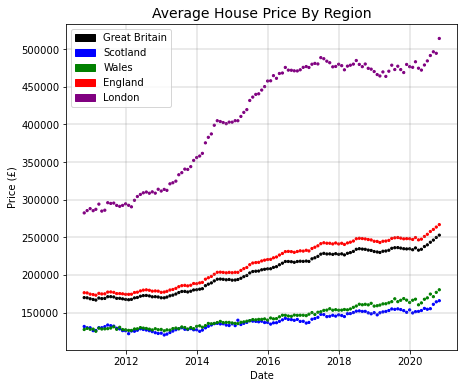

In [12]:
# Put the regions of interest into a list
regions = ['Great Britain', 'England', 'Wales', 'Scotland', 'London']

# Determine the start date to give a 10 year timespan (adapted from code at stackoverflow [8])
import datetime
endDate = max(subdf['Date'])
startDate = pd.to_datetime(datetime.date((endDate.year - 10), endDate.month, endDate.day), format="%Y-%m-%d")

# Filter for required regions and date
subReg = subdf[(subdf['RegionName'].isin(regions)) & (subdf['Date'] >= startDate)]

# Alias pyplot to use for plotting graphs
import matplotlib.pyplot as plt

# Determine the graph's variables
date = subReg['Date']
price = subReg['AveragePrice']

# To colour code by region, first create a dictionary
regDic = {
    'Great Britain': 'Black',
    'Scotland': 'Blue',
    'Wales': 'Green',
    'England': 'Red',
    'London': 'Purple'
}
# Create region list
region = []
# Assign colours to regions
for reg in subReg['RegionName']:
    region.append(regDic[reg])

# Define graph attributes (built using matplotlib documentation [9])
plt.figure(figsize=(7,6))
plt.scatter(date, price, c=region,s=5)
plt.xlabel("Date")
plt.ylabel("Price (£)")
plt.title("Average House Price By Region", fontsize=14)
plt.grid(color='grey', linewidth=0.4, alpha=0.8)

# Import mpatches to generate a custom legend (code adapted from matplotlib tutorial [10])
import matplotlib.patches as mpatches
# Generate list of legend objects
regLeg = []
for reg in regDic:
    regLeg.append(mpatches.Patch(color=regDic[reg], label=reg))

plt.legend(handles=regLeg)
plt.show()

Note that this is kept as a scatterplot rather than a line graph so that trend deviations are more evident. From this graph, we can see that London prices increased dramatically between 2013 and 2017 relative to Great Britain, before following the general trend, with another sharper increase towards the end of 2020. England prices have risen slightly above the country average, with Scotland and Wales prices not seeing the same absolute increase in price. This indicates that overall, existing loans provided to London and England should have reduced their loan-to-value ratio (and therefore risk) to a greater extent than in Wales and Scotland. As these are national averages, this could be examined against a mortgage lender's own loan book to confirm the validity of this trend or see how it compares.

# Short-term Trends

## Most recent year, grouped by nation
It is important to note that the 10-year trend graph above shows absolute price changes and not percentage changes. It is useful to know how prices are changing around the country on a percentage basis in the shorter term to have an idea of price trajectory.
The subdf dataset is filtered to subshort by finding the most recent year, then further sliced by nation.

In [13]:
# endDate already contains the most recent date, find 1 year prior
shortStart = pd.to_datetime(datetime.date((endDate.year - 1), endDate.month, endDate.day), format="%Y-%m-%d")
subshort = subdf[subdf['Date'] >= shortStart].copy()

# Select each region required based on Area Code (built using pandas documentation [11])
shortS = subshort[subshort['AreaCode'].str.contains('S')]
shortW = subshort[subshort['AreaCode'].str.contains('W')]
shortE = subshort[subshort['AreaCode'].str.contains('E')]
shortL = subshort[subshort['RegionName'] == 'London']
shortG = subshort[subshort['RegionName'] == 'Great Britain']

print(
    shortE[['1m%Change', '12m%Change']].describe()
)

         1m%Change   12m%Change
count  4628.000000  4628.000000
mean      0.438487     2.066624
std       1.517710     3.064978
min     -11.902823   -14.063315
25%      -0.452851     0.097663
50%       0.336320     1.868972
75%       1.291585     3.855523
max      12.387546    28.646251


Looking at the description for percentage changes for England as an example, we can see that the range is far greater in the 12month change than in the 1month change. As we are looking at shorter term trends, the monthly changes are likely more informative. However, comparing the regions in this way is not intuitive, so boxplots are constructed.

## Boxplots

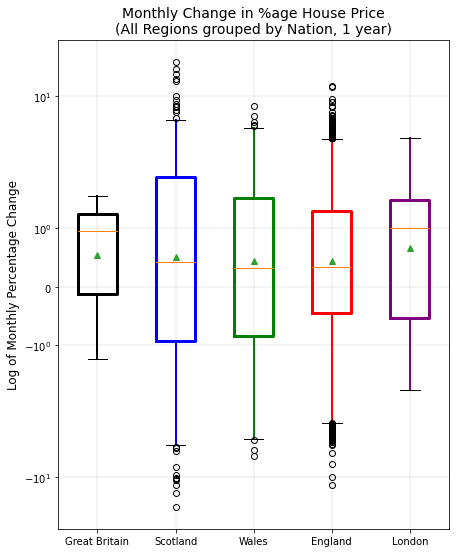

In [14]:
fig, ax = plt.subplots(figsize=(7, 9))

# Initiate a counting integer for the total number of boxplots
pos = 0
def boxShort(df,region):
    """Plot a(n additional) 1-month %age change boxplot of the selected region"""
    global pos
    # Increment the number of boxplots
    pos = pos + 1
    # Build the boxplot attributes (code adapted from stackoverflow and using matplotlib documentation [12 - 15])
    return ax.boxplot(
        # Select the data
        df['1m%Change'],
        # Show the mean of the data    
        showmeans=True,
        # Add the boxplot to the end of the graph
        positions = [pos],
        # Choose the colour and thickness (based on previous graph's colours)
        boxprops=dict(color = regDic[region], linewidth=3.0),
        whiskerprops=dict(color = regDic[region], linewidth=2.0),
        # Label the plot
        labels = [region],
        # Choose size of boxplot
        widths = 0.5
    )

# Choose boxes to plot
box1 = boxShort(shortG,'Great Britain')
box2 = boxShort(shortS,'Scotland')
box3 = boxShort(shortW,'Wales')
box4 = boxShort(shortE,'England')
box5 = boxShort(shortL,'London')

# Label y-axis, insert title, and show gridlines
ax.set_ylabel('Log of Monthly Percentage Change', fontsize = 12)
ax.set_title('Monthly Change in %age House Price\n(All Regions grouped by Nation, 1 year)', fontsize = 14)
plt.grid(color='grey', linewidth=0.3, alpha=0.6)

# Change scale of graph from linear to logarithmic (symmetrical log allows -ve values)
plt.yscale('symlog')

plt.show()

From the boxplots, we see that there is clear negative skew in the London data (mean = green triangle), suggesting there has generally been a weaker positive or a negative trend in housing prices over the short term. This could negatively impact the LTVs of London property loans.
In Scotland, Wales and England overall, whilst skew is not obvious, there is clearly a greater spread of the percentage change in Scotland than Wales, and in Wales than England. This is whilst the means and medians of these nations are similar and low, which indicates that England prices in general are currently less volatile than Wales or Scotland, suggesting lower risk of valuation changes. However, Wales shows fewer outliers, suggesting that Wales property values are changing more predictably and homogenously, and therefore potentially require less complex modelling to predict future valuation changes.

## Probability density plot
To further compare the short-term changes in all regions grouped by nation, a probability density plot is drawn.

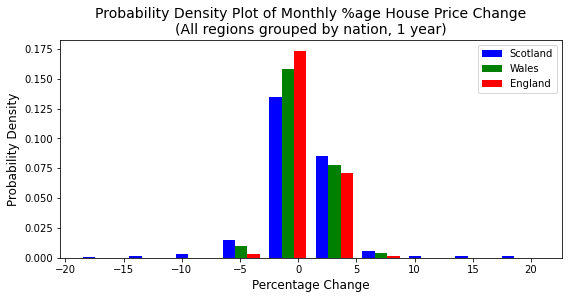

In [15]:
# Select data to include
x = [shortS['1m%Change'],shortW['1m%Change'],shortE['1m%Change']]
# Turn off 'deprecated' warning for different data lengths (code from stackoverflow [16])
import numpy as np
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
# Choose size of graph
plt.figure(figsize=(9,4))
# Construct histogram (written using matplotlib documentation [17])
plt.hist(
    x,
    bins=10,
    density=True,
    color=[regDic['Scotland'],regDic['Wales'],regDic['England']],
    label=['Scotland','Wales','England']
)
# Set graph labelling attributes
plt.xlabel('Percentage Change', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Probability Density Plot of Monthly %age House Price Change\n(All regions grouped by nation, 1 year)', fontsize=14)
plt.legend()
plt.show()

The histogram shows the probabilites of different percentage changes in each nation when examining by region. This again shows the greater spread of price change in Scottish regions, but also the general clustering around 0 for all nations, particularly in England, with some right skew in all regions grouped by nation. Generally, this suggests a slight positive monthly trend in value, but with possible higher volatility in Scotland. This could also suggest that there is some extremification of property values in Scottish regions, and further research could look at testing this idea and identifying those regions.

# References

1. 'UK House Price Index: data downloads November 2020'. Gov.uk. 20 Jan 2021. Available at: https://www.gov.uk/government/statistical-data-sets/uk-house-price-index-data-downloads-november-2020. Accessed: 31 Jan 2021.

2. 'Convert DataFrame column type from string to datetime, dd/mm/yyyy format'. Andy Hayden. 24 Dec 2015. Available at: https://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime-dd-mm-yyyy-format. Accessed: 31 Jan 2021.

3. 'About the UK House Price Index'. Gov.uk. 02 Nov 2020. Available at: https://www.gov.uk/government/publications/about-the-uk-house-price-index/about-the-uk-house-price-index#data-tables. Accessed: 31 Jan 2021.

4. 'Python isinstance() Function'. W3Schools.com. Available at: https://www.w3schools.com/python/ref_func_isinstance.asp. Accessed: 01 Feb 2021.

5. 'Python String startswith() Method'. W3Schools.com. Available at: https://www.w3schools.com/python/ref_string_startswith.asp. Accessed: 02 Feb 2021.

6. 'Python | Pandas isnull() and notnull()'. GeeksforGeeks. 02 Sep 2020. Available at: https://www.geeksforgeeks.org/python-pandas-isnull-and-notnull/. Accessed: 03 Feb 2021.

7. 'pandas.DataFrame.sort_values'. Pandas Development Team. Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html. Accessed: 03 Feb 2021.

8. 'How to increment datetime by custom months in python without using library [duplicate]'. Dave Webb. 09 Nov 2010. Available at: https://stackoverflow.com/questions/4130922/how-to-increment-datetime-by-custom-months-in-python-without-using-library. Accessed: 03 Feb 2021.

9. 'matplotlib.pyplot'. Matplotlib Development Team. 05 Jan 2020. Available at: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html. Accessed: 04 Feb 2021.

10. 'Legend guide'. Matplotlib Development Team. 05 Jan 2020. Available at: https://matplotlib.org/3.1.1/tutorials/intermediate/legend_guide.html. Accessed: 04 Feb 2021.

11. 'pandas.Series.str.contains'. Pandas Development Team. Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html. Accessed: 05 Feb 2021

12. 'Box plots with custom fill colors'. Matplotlib Development Team. 05 Jan 2020. Available at: https://matplotlib.org/3.1.1/gallery/statistics/boxplot_color.html. Accessed: 06 Feb 2021.

13. 'Python Matplotlib Boxplot Color'. ImportanceOfBeingErnest. 02 Feb 2017. Available at: https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color. Accessed: 06 Feb 2021.

14. 'matplotlib.axes.Axes.boxplot'. Matplotlib Development Team. 05 Jan 2020. Available at: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html. Accessed: 06 Feb 2021.

15. 'matplotlib.pyplot.yscale'. Matplotlib Development Team. 05 Jan 2020. Available at: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html. Accessed: 06 Feb 2021.

16. 'Debugging Numpy VisibleDeprecationWarning (ndarray from ragged nested sequences)'. hpaulj. 26 Jul 2020. Available at: https://stackoverflow.com/questions/63097829/debugging-numpy-visibledeprecationwarning-ndarray-from-ragged-nested-sequences. Accessed: 08 Feb 2021.

17. 'matplotlib.pyplot.hist'. Matplotlib Development Team. 05 Jan 2020. Available at: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html. Accessed: 07 Feb 2021.